In [1]:
%%capture
%pip install -r ../requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

# Load weight data
df = pd.read_csv("../data/weight.csv", parse_dates=["Week of"])
df = df.dropna(subset=["Average"])
df["Year"] = df["Week of"].dt.year

# Filter to years with sufficient data
year_counts = df["Year"].value_counts()
valid_years = year_counts[year_counts >= 5].index
df = df[df["Year"].isin(valid_years)]

df.head()

,Week of,Average,Year
0,2018-09-24,192.600000,2018
1,2018-10-01,194.533333,2018
2,2018-10-08,194.960000,2018
3,2018-10-15,196.600000,2018
4,2018-10-22,198.466667,2018


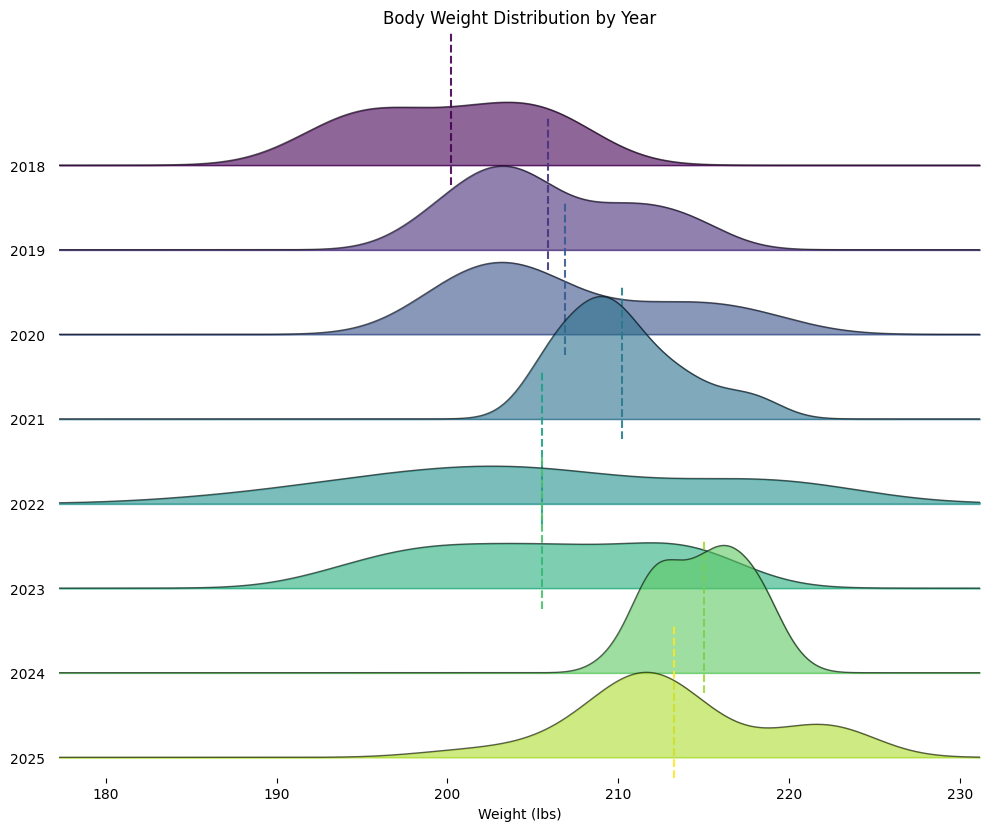

In [9]:
# Create ridgeline plot
years = sorted(df["Year"].unique())
cmap = plt.cm.viridis
colors = [cmap(i / (len(years) - 1)) for i in range(len(years))]

fig, axes = joypy.joyplot(
    df,
    by="Year",
    column="Average",
    figsize=(10, 8),
    colormap=cmap,
    linewidth=1,
    alpha=0.6,
    overlap=1,
)

# Add vertical lines for yearly averages
year_means = df.groupby("Year")["Average"].mean()
for i, year in enumerate(years):
    ax = axes[i]
    mean_val = year_means[year]
    ax.axvline(mean_val, color=colors[i], linestyle="--", linewidth=1.5, alpha=0.9)

plt.xlabel("Weight (lbs)")
plt.title("Body Weight Distribution by Year")
plt.show()